In [55]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
import  matplotlib.pyplot as plt

In [56]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [57]:
def init_params():
    w = torch.normal(0, std=1, size=(num_inputs,1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w,b]

In [77]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [58]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [78]:
def train(lambda_):
    w, b = init_params()
    net, loss = lambda X : d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X),y) + lambda_ * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
        if (epoch + 1) % 5 ==0 :
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter,loss)
                                   ,d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数为:', torch.norm(w).item())

In [60]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=1)
        nn.init.zeros_(m.bias)

In [69]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    net.apply(init_weights)
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
        {'params':net[0].weight, 'weight_decay':wd},
        {'params':net[0].bias}], lr)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch+1)%5==0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数为:', net[0].weight.norm().item())

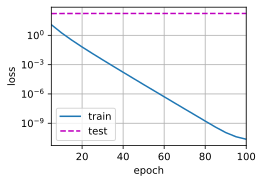

In [70]:
train_concise(0)

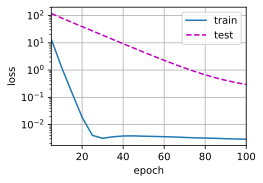

In [71]:
train_concise(3)

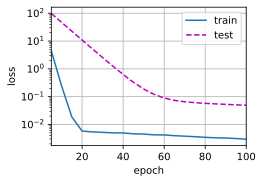

In [72]:
train_concise(6)

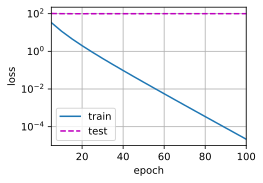

In [79]:
train(0)

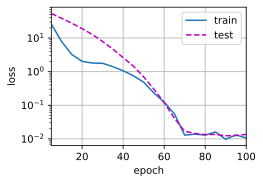

In [80]:
train(3)

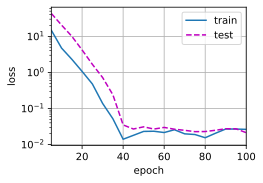

In [81]:
train(6)

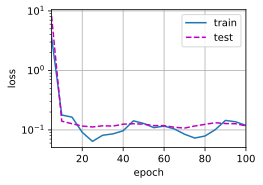

In [82]:
train(20)